# Periodogram

## Import needed libraries

In [274]:
import numpy as np
import pandas as pd

These libraries may not be included in the anaconda distribution

To install them, open a terminal and type the following in the anaconda prompt (windows) or in a terminal (mac):

`conda install plotly`

In [275]:
import plotly 
import plotly.graph_objects as go

In [276]:
# alternative plotting library
import matplotlib.pyplot as plt

In [277]:
okc=pd.read_csv("/Users/sak/Downloads/2009655.csv")

In [278]:
okc.head()
#okc[['DATE','TAVG']].head()

,STATION,NAME,DATE,CDSD,EMNT,EMXT,HDSD,TAVG,TMAX,TMIN
0,USW00013967,"OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US",2007-01,0,16,71,2075,36.8,45.6,27.9
1,USW00013967,"OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US",2007-02,2,8,81,2718,42.1,53.2,31.0
2,USW00013967,"OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US",2007-03,37,21,82,2903,60.2,71.1,49.2
3,USW00013967,"OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US",2007-04,70,33,85,3165,57.4,67.6,47.2
4,USW00013967,"OKLAHOMA CITY WILL ROGERS WORLD AIRPORT, OK US",2007-05,258,51,86,3167,71.0,79.2,62.7


In [279]:
# Subset the data to just the first 36 months (as in the textbook)
okc1=okc[:36]
# convert from a pandas DataFrame to a simple list (temps)
temps = (okc1.TAVG - 32) * 5 / 9
#temps = temps - np.mean(temps)
# create an index list (okci)
okci = np.arange(36) # index 0-35
print("N=", len(okci), "dt=1month")

N= 36 dt=1month


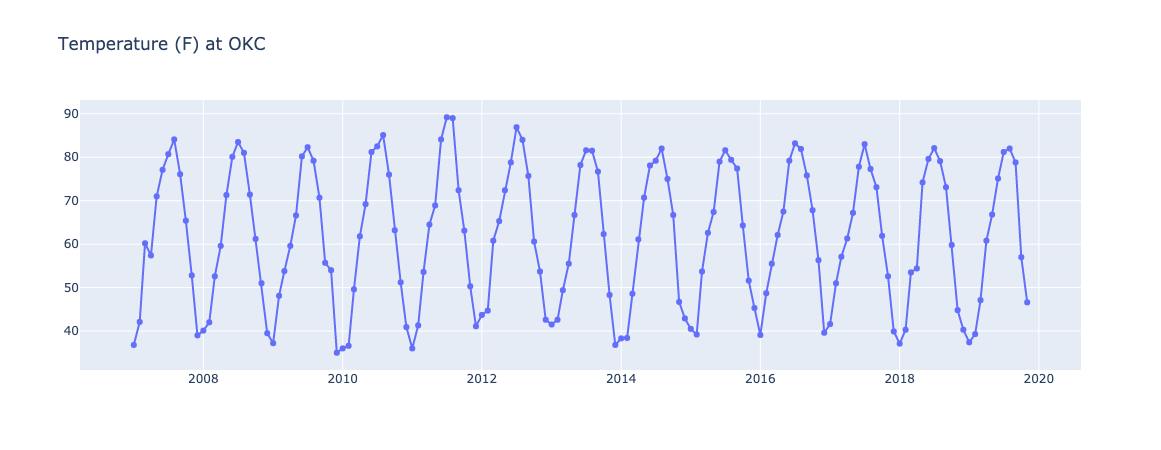

In [280]:
# Plot all the data directly from the pandas DataFrame (okc)
traceorig = go.Scatter(
    x = okc.DATE,
    y = okc.TAVG,
    mode = 'lines+markers',
    name = 'Original Data'
)

fig = go.Figure(
    data=[traceorig],
    layout_title_text="Temperature (F) at OKC",
)

fig.show()

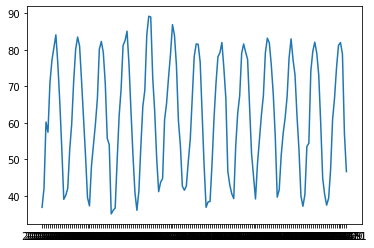

In [281]:
plt.plot(okc.DATE, okc.TAVG)

## Plot Input Data

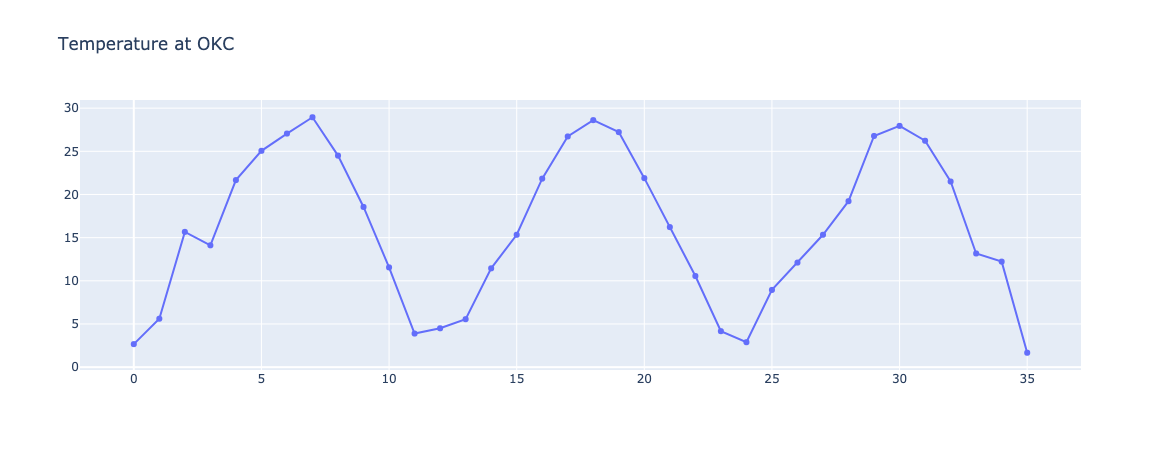

In [282]:
# plot the two lists (temps vs. okci)
tracedata = go.Scatter(
    x = okci,
    y = temps,
    mode = 'lines+markers',
    name = 'Data'
)

fig = go.Figure(
    data=[tracedata],
    layout_title_text="Temperature at OKC",
)

fig.show()

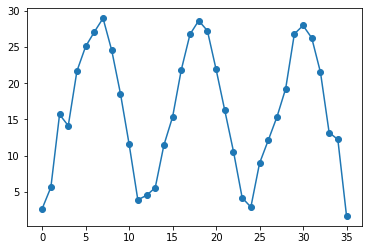

In [283]:
plt.plot(okci, temps, '-o')

## First Harmonic

Integral of sin product: 8.417196171616888  and cos product: -5.602236549255576
Total power: 10.111095180310441


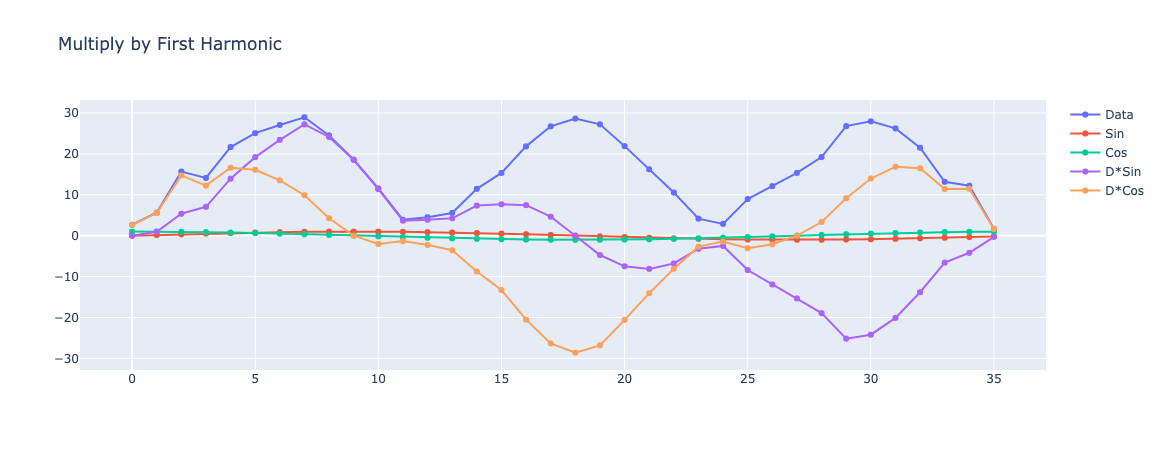

In [284]:
harm1sin = np.sin(2*np.pi* 1 * okci/36)
harm1cos = np.cos(2*np.pi* 1 * okci/36)

# Generate sin and cos signals
trace1sin = go.Scatter(
    x = okci,
    y = harm1sin,
    mode = 'lines+markers',
    name = 'Sin'
)
trace1cos = go.Scatter(
    x = okci,
    y = harm1cos,
    mode = 'lines+markers',
    name = 'Cos'
)

# Multiply with the original data
p1sin = harm1sin * temps
p1cos = harm1cos * temps

trace1psin = go.Scatter(
    x = okci,
    y = p1sin,
    mode = 'lines+markers',
    name = 'D*Sin'
)
trace1pcos = go.Scatter(
    x = okci,
    y = p1cos,
    mode = 'lines+markers',
    name = 'D*Cos'
)
fig = go.Figure(
    data=[tracedata, trace1sin, trace1cos, trace1psin, trace1pcos],
    layout_title_text="Multiply by First Harmonic"
)

# calculate the integrals/sums/power
print("Integral of sin product:", np.sum(p1sin), " and cos product:", np.sum(p1cos))
print("Total power:", np.sqrt(np.sum(p1sin)**2 + np.sum(p1cos)**2))

fig.show()

Integral of sin product: 6.6019873839787655  and cos product: -7.119434622815158
Total power: 9.709407127459121


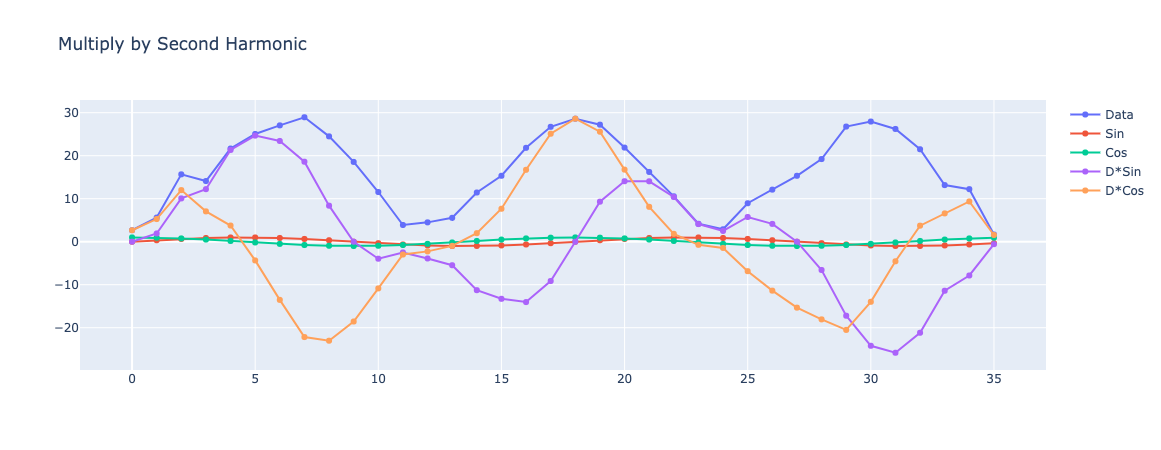

In [285]:
harm2sin = np.sin(2*np.pi* 2 * okci/36)
harm2cos = np.cos(2*np.pi* 2 * okci/36)

# Create a trace
trace2sin = go.Scatter(
    x = okci,
    y = harm2sin,
    mode = 'lines+markers',
    name = 'Sin'
)
trace2cos = go.Scatter(
    x = okci,
    y = harm2cos,
    mode = 'lines+markers',
    name = 'Cos'
)

p2sin = harm2sin * temps
p2cos = harm2cos * temps

trace2psin = go.Scatter(
    x = okci,
    y = p2sin,
    mode = 'lines+markers',
    name = 'D*Sin'
)
trace2pcos = go.Scatter(
    x = okci,
    y = p2cos,
    mode = 'lines+markers',
    name = 'D*Cos'
)
fig = go.Figure(
    data=[tracedata, trace2sin, trace2cos, trace2psin, trace2pcos],
    layout_title_text="Multiply by Second Harmonic"
)
print("Integral of sin product:", np.sum(p2sin), " and cos product:", np.sum(p2cos))
print("Total power:", np.sqrt(np.sum(p2sin)**2 + np.sum(p2cos)**2))
fig.show()

Integral of sin product: -0.12945150105108072  and cos product: -215.62888627395975
Total power: 215.62892513167012


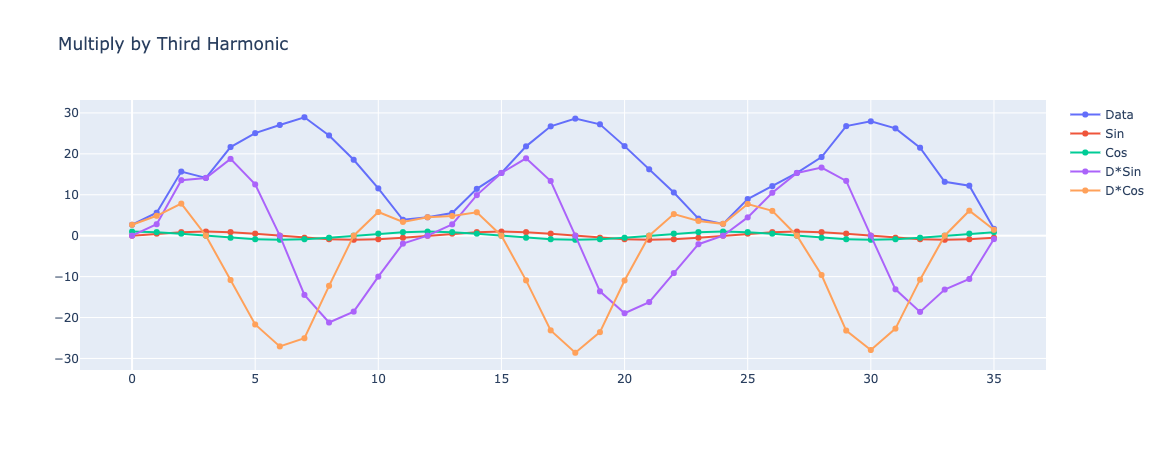

In [286]:
harm3sin = np.sin(2*np.pi* 3 * okci/36)
harm3cos = np.cos(2*np.pi* 3 * okci/36)

# Create a trace
trace3sin = go.Scatter(
    x = okci,
    y = harm3sin,
    mode = 'lines+markers',
    name = 'Sin'
)
trace3cos = go.Scatter(
    x = okci,
    y = harm3cos,
    mode = 'lines+markers',
    name = 'Cos'
)

p3sin = harm3sin * temps
p3cos = harm3cos * temps

trace3psin = go.Scatter(
    x = okci,
    y = p3sin,
    mode = 'lines+markers',
    name = 'D*Sin'
)
trace3pcos = go.Scatter(
    x = okci,
    y = p3cos,
    mode = 'lines+markers',
    name = 'D*Cos'
)
fig = go.Figure(
    data=[tracedata, trace3sin, trace3cos, trace3psin, trace3pcos],
    layout_title_text="Multiply by Third Harmonic"
)
print("Integral of sin product:", np.sum(p3sin), " and cos product:", np.sum(p3cos))
print("Total power:", np.sqrt(np.sum(p3sin)**2 + np.sum(p3cos)**2))
fig.show()

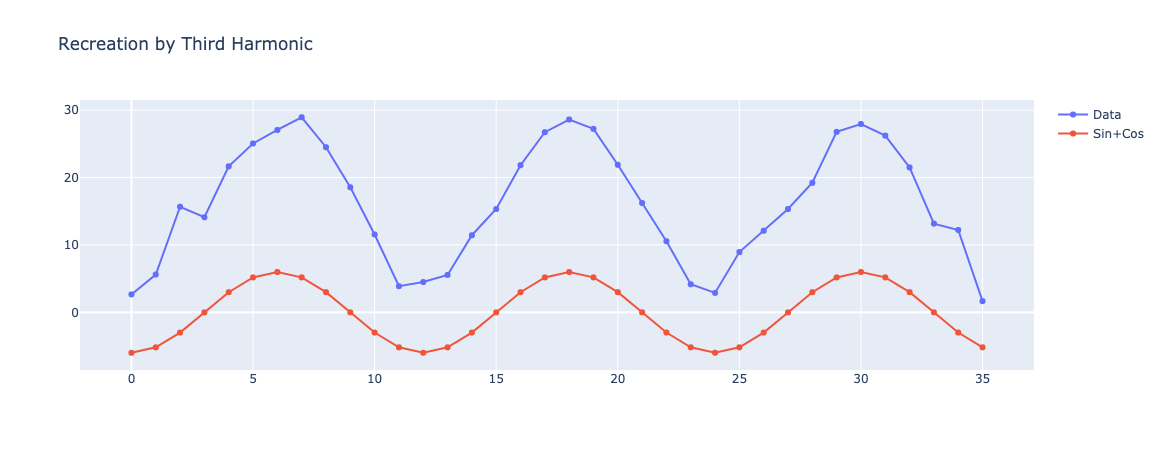

In [287]:
re3sin = -0.129 / 36 * np.sin(2*np.pi* 3 * okci/36)
re3cos = -215.62 / 36 * np.cos(2*np.pi* 3 * okci/36)

# Create a trace
trace3re = go.Scatter(
    x = okci,
    y = re3sin + re3cos,
    mode = 'lines+markers',
    name = 'Sin+Cos'
)
fig = go.Figure(
    data=[tracedata, trace3re],
    layout_title_text="Recreation by Third Harmonic"
)

fig.show()

Integral of sin product: -8.417196171616668  and cos product: -5.6022365492532735
Total power: 10.111095180308983


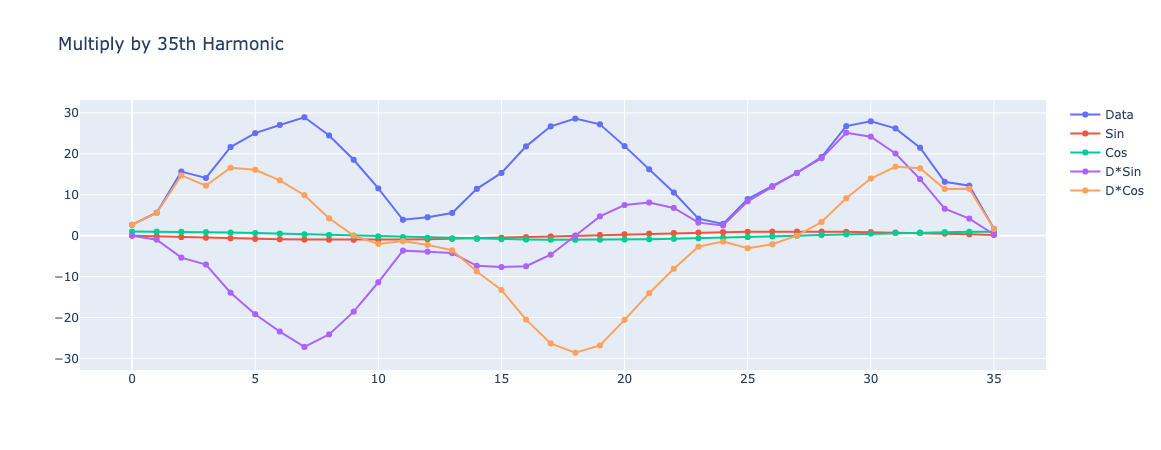

In [288]:
harm35sin = np.sin(2*np.pi* 35 * okci/36)
harm35cos = np.cos(2*np.pi* 35 * okci/36)

# Create a trace
trace35sin = go.Scatter(
    x = okci,
    y = harm35sin,
    mode = 'lines+markers',
    name = 'Sin'
)
trace35cos = go.Scatter(
    x = okci,
    y = harm35cos,
    mode = 'lines+markers',
    name = 'Cos'
)

p35sin = harm35sin * temps
p35cos = harm35cos * temps

trace35psin = go.Scatter(
    x = okci,
    y = p35sin,
    mode = 'lines+markers',
    name = 'D*Sin'
)
trace35pcos = go.Scatter(
    x = okci,
    y = p35cos,
    mode = 'lines+markers',
    name = 'D*Cos'
)
fig = go.Figure(
    data=[tracedata, trace35sin, trace35cos, trace35psin, trace35pcos],
    layout_title_text="Multiply by 35th Harmonic"
)
print("Integral of sin product:", np.sum(p35sin), " and cos product:", np.sum(p35cos))
print("Total power:", np.sqrt(np.sum(p35sin)**2 + np.sum(p35cos)**2))
fig.show()

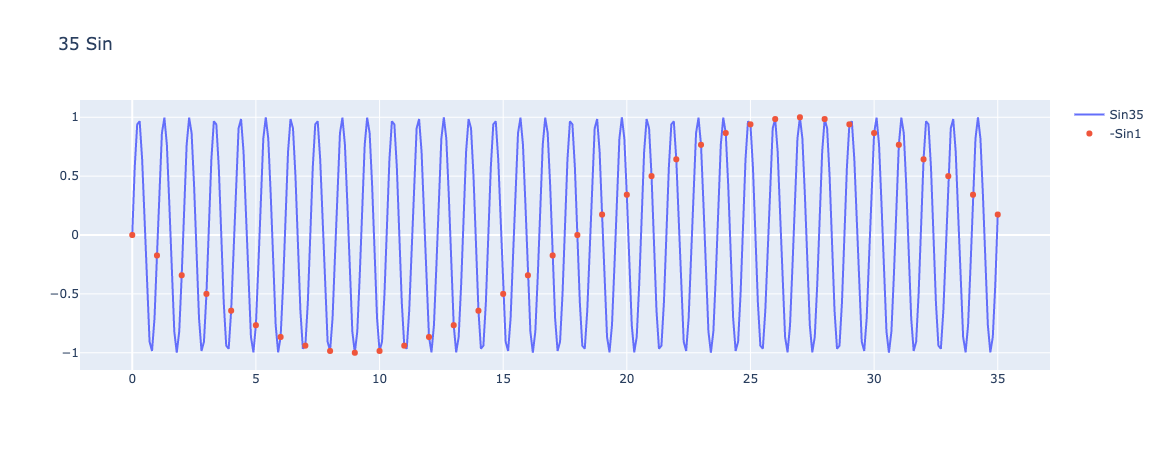

In [289]:
i10 = np.arange(0, 35.1, .1)
sin10 = np.sin(2*np.pi * 35 *i10/36)
trace35sin10 = go.Scatter(
    x = i10,
    y = sin10,
    mode = 'lines',
    name = 'Sin35'
)
trace1sin10 = go.Scatter(
    x = okci,
    y = -harm1sin,
    mode = 'markers',
    name = '-Sin1'
)
fig = go.Figure(
    data=[trace35sin10, trace1sin10],
    layout_title_text="35 Sin"
)

fig.show()

In [290]:
def sincos(data, m):
    "Return sum(data*sin(2pi m n/N), sum(data*cos)"
    N=len(data)
    idx = np.arange(N)
    s = np.sin(2*np.pi * m *idx / N) * data
    c = np.cos(2*np.pi * m *idx / N) * data
    return sum(s), sum(c)

In [291]:
sincos(temps,3)

(-0.12945150105110914, -215.62888627395972)

In [292]:
sinAmps = []
cosAmps = []
N = len(temps)
for i in np.arange(N):
    (s,c) = sincos(temps, i)
    sinAmps.append(s)
    cosAmps.append(c)

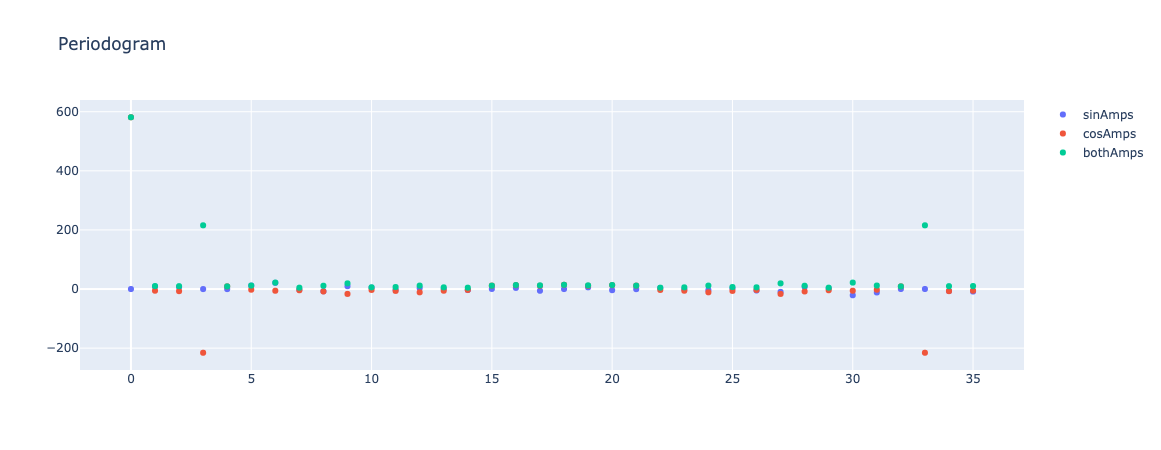

In [293]:
tracesinamps = go.Scatter(
    x = np.arange(N),
    y = sinAmps,
    mode = 'markers',
    name = 'sinAmps'
)
tracecosamps = go.Scatter(
    x = np.arange(N),
    y = cosAmps,
    mode = 'markers',
    name = 'cosAmps'
)

traceamps = go.Scatter(
    x = np.arange(N),
    y = np.sqrt(np.square(sinAmps) + np.square(cosAmps)),
    mode = 'markers',
    name = 'bothAmps'
)


fig = go.Figure(
    data=[tracesinamps, tracecosamps, traceamps],
    layout_title_text="Periodogram"
)

fig.show()

In [294]:
N=len(temps)
idx = np.arange(N)
recons = np.zeros(N)
for i in np.arange(36): #np.arange(N): #[3,6,9,12,15,16,17,18]:
    #print(i, sinAmps[i], cosAmps[i])
    recons += sinAmps[i] * np.sin(2*np.pi * i * okci /36) / (N)
    recons += cosAmps[i] * np.cos(2*np.pi * i * okci /36) / (N)

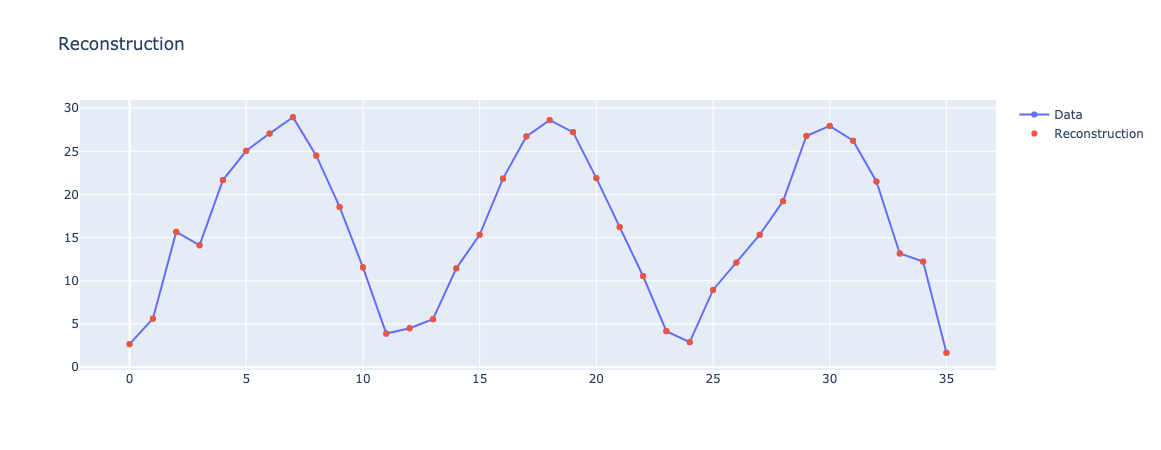

In [295]:
tracerecons = go.Scatter(
    x = np.arange(N),
    y = recons,
    mode = 'markers',
    name = 'Reconstruction'
)


fig = go.Figure(
    data=[tracedata, tracerecons],
    layout_title_text="Reconstruction"
)

fig.show()

In [296]:
print(temps-recons)

0    -1.056932e-13
1     5.595524e-14
2    -3.197442e-14
3    -7.993606e-14
4    -4.973799e-14
5     7.105427e-15
6    -2.486900e-14
7    -8.526513e-14
8     7.460699e-14
9     4.618528e-14
10    2.309264e-14
11   -1.509903e-14
12    4.529710e-14
13    9.769963e-14
14   -4.263256e-14
15    8.704149e-14
16    1.385558e-13
17    4.973799e-14
18    2.131628e-14
19    8.171241e-14
20    9.237056e-14
21    6.039613e-14
22    7.105427e-14
23   -5.861978e-14
24   -1.687539e-14
25    1.065814e-14
26    1.012523e-13
27    9.414691e-14
28   -3.907985e-14
29   -7.105427e-15
30   -3.907985e-14
31   -6.039613e-14
32   -9.947598e-14
33   -5.684342e-14
34    1.776357e-14
35   -7.038814e-14
Name: TAVG, dtype: float64
